# Objective
The company wants to understand what factors contributed most to employee turnover and to create a model that can predict if a certain employee will leave the company or not. The goal is to create or improve different retention strategies on targeted employees. Overall, the implementation of this model will allow management to create better decision-making actions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
#Importing Data 
df = pd.read_csv("data.csv")

In [3]:
#Checking whether our data contains any missing value or not
df.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [4]:
#Let's look at the data 
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
#Renaming the columns 
df = df.rename(columns={'satisfaction_level': 'Satisfaction', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'ProjectCount',
                        'average_montly_hours': 'AverageMonthlyHours',
                        'time_spend_company': 'YearsAtCompany',
                        'Work_accident': 'WorkAccident',
                        'promotion_last_5years': 'Promotion',
                        'sales' : 'Department',
                        'left' : 'Exit'
                        })
df.head()

,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Exit,Promotion,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
#Moving the column 'Exit' to the end which is to be predicted
front = df['Exit']
df.drop(labels=['Exit'], axis=1,inplace = True)
df.insert(0, 'Exit', front)
df.head()

,Exit,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Promotion,Department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [7]:
#Checking Dimenssion of the Data
df.shape

(14999, 10)

In [8]:
#Checking Data Types of our features
df.dtypes

Exit                     int64
Satisfaction           float64
Evaluation             float64
ProjectCount             int64
AverageMonthlyHours      int64
YearsAtCompany           int64
WorkAccident             int64
Promotion                int64
Department              object
salary                  object
dtype: object

Looks like 76% of employees stayed and 24% of employees exited!

In [9]:
Exit_Rate = df.Exit.value_counts()/len(df)
Exit_Rate

0    0.761917
1    0.238083
Name: Exit, dtype: float64

In [10]:
#Displaying the statstical overview of the data
df.describe()

,Exit,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [11]:
#Group by Exit
Exit_group = df.groupby('Exit')
Exit_group.mean()

,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Promotion
Exit,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


### Correlation 
From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

,Exit,Satisfaction,Evaluation,ProjectCount,AverageMonthlyHours,YearsAtCompany,WorkAccident,Promotion
Exit,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
Satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
Evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
ProjectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
AverageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
YearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
WorkAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
Promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


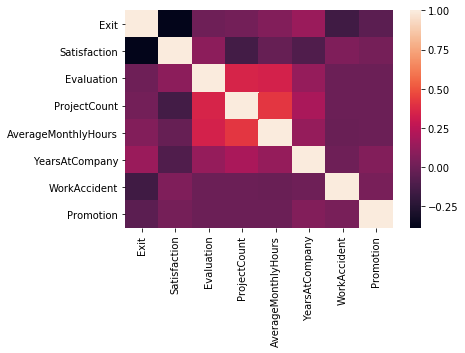

In [12]:
#Checking the Correlation
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

 ### Salary VS. Exit

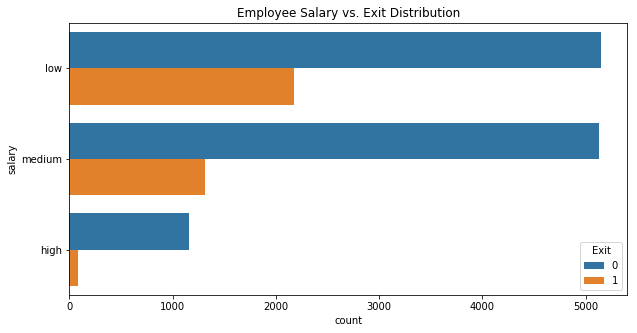

In [13]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(y="salary", hue='Exit', data=df).set_title('Employee Salary vs. Exit Distribution');

### Department VS. Exit

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

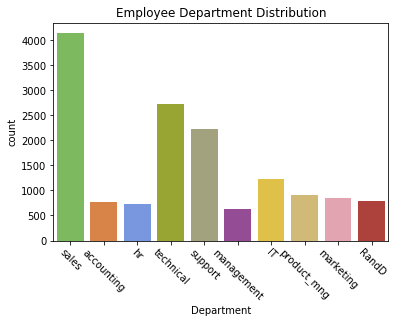

In [14]:
color_types = ['#78C850','#F08030','#6890F0','#A8B820','#A8A878','#A040A0','#F8D030',  
                '#E0C068','#EE99AC','#C03028','#F85888','#B8A038','#705898','#98D8D8','#7038F8']

# Count Plot (a.k.a. Bar Plot)
sns.countplot(x='Department', data=df, palette=color_types).set_title('Employee Department Distribution');
 
# Rotate x-labels
plt.xticks(rotation=-45)

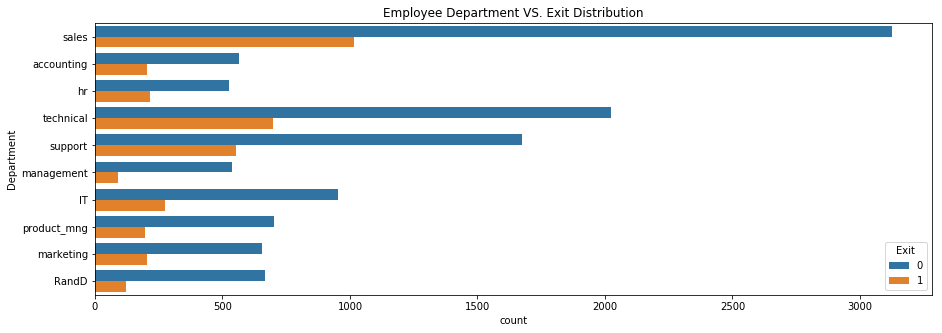

In [15]:
f, ax = plt.subplots(figsize=(15, 5))
sns.countplot(y="Department", hue='Exit', data=df).set_title('Employee Department VS. Exit Distribution');

### ProjectCount VS. Exit

• More than half of the employees with 2,6, and 7 projects left the company

• Majority of the employees who did not leave the company had 3,4, and 5 projects

• All of the employees with 7 projects left the company

• There is an increase in employee turnover rate as project count increases

[Text(0,0.5,'Percent')]

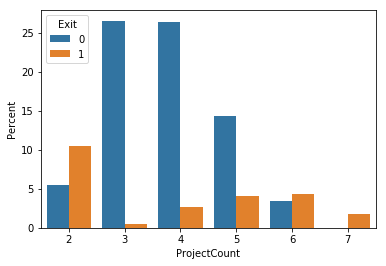

In [16]:
ax = sns.barplot(x="ProjectCount", y="ProjectCount", hue="Exit", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

### Evaluation VS. Exit

• There is a biomodal distribution for those that had a Exit.

• Employees with low performance tend to leave the company more

• Employees with high performance tend to leave the company more

• The sweet spot for employees that stayed is within 0.6-0.8 evaluation

Text(0.5,1,'Employee Evaluation Distribution - Exited V.S. Not Exited')

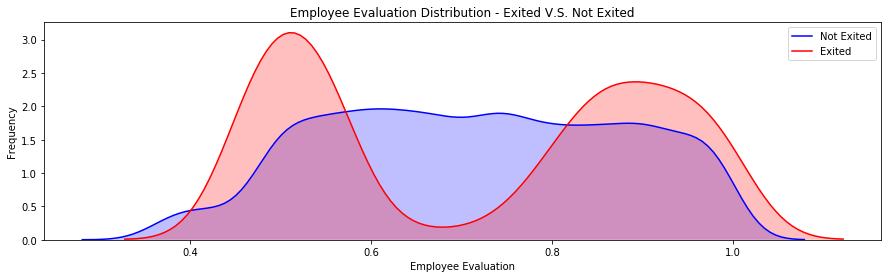

In [17]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['Exit'] == 0),'Evaluation'] , color='b',shade=True,label='Not Exited')
ax=sns.kdeplot(df.loc[(df['Exit'] == 1),'Evaluation'] , color='r',shade=True, label='Exited')
ax.set(xlabel='Employee Evaluation', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Exited V.S. Not Exited')


### AverageMonthlyHours VS. Exited

• Another bi-modal distribution for employees that Exited

• Employees who had less hours of work (~150hours or less) left the company more

• Employees who had too many hours of work (~250 or more) left the company

• Employees who left generally were underworked or overworked.

Text(0.5,1,'Employee AverageMonthly Hours Distribution - Exited V.S. Not Exited')

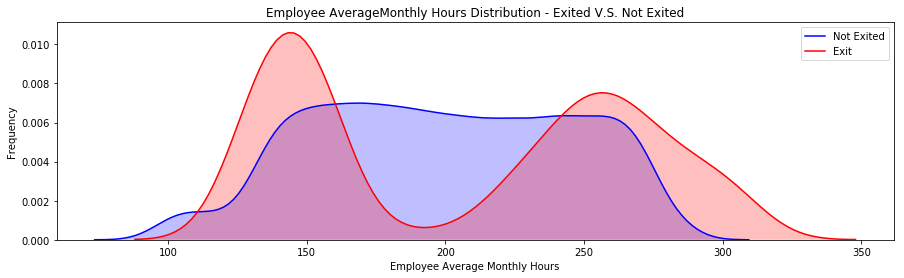

In [18]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Exit'] == 0),'AverageMonthlyHours'] , color='b',shade=True, label='Not Exited')
ax=sns.kdeplot(df.loc[(df['Exit'] == 1),'AverageMonthlyHours'] , color='r',shade=True, label='Exit')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Exited V.S. Not Exited')

### Satisfaction VS. Exit

• There is a tri-modal distribution for employees that Exited

• Employees who had really low satisfaction levels (0.2 or less) left the company more

• Employees who had low satisfaction levels (0.3~0.5) left the company more

• Employees who had really high satisfaction levels (0.7 or more) left the company more

Text(0.5,1,'Employee Satisfaction Distribution - Exited V.S. Not Exited')

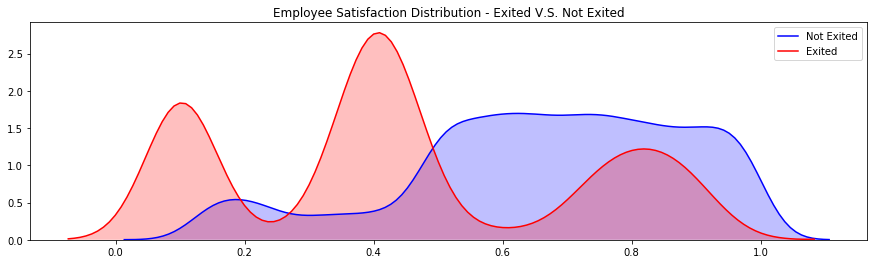

In [19]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Exit'] == 0),'Satisfaction'] , color='b',shade=True, label='Not Exited')
ax=sns.kdeplot(df.loc[(df['Exit'] == 1),'Satisfaction'] , color='r',shade=True, label='Exited')
plt.title('Employee Satisfaction Distribution - Exited V.S. Not Exited')

### Feature Engineering 

Top 3 Features:

1. Satisfaction
2. YearsAtCompany
3. Evaluation

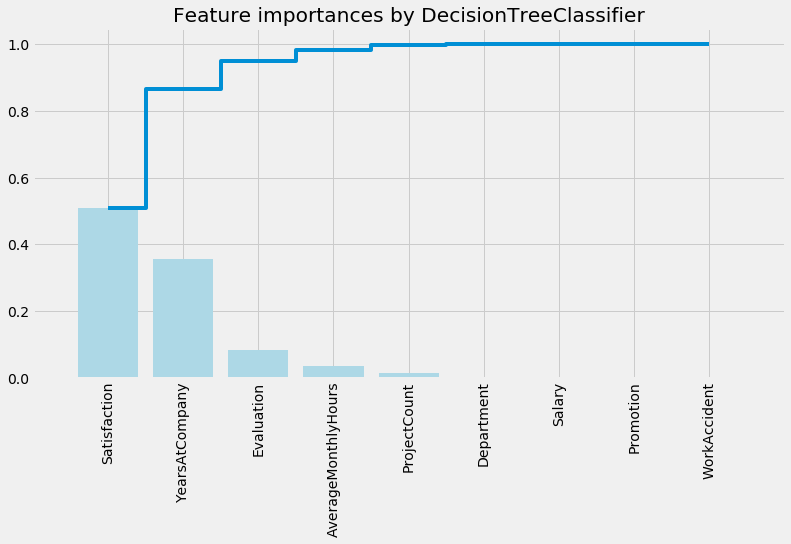

In [20]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,6)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'Satisfaction', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'ProjectCount',
                        'average_montly_hours': 'AverageMonthlyHours',
                        'time_spend_company': 'YearsAtCompany',
                        'Work_accident': 'WorkAccident',
                        'promotion_last_5years': 'Promotion',
                        'sales' : 'Department',
                        'left' : 'Exit',
                        'salary' : 'Salary'
                        })

# Convert these variables into categorical variables
df["Department"] = df["Department"].astype('category').cat.codes
df["Salary"] = df["Salary"].astype('category').cat.codes

# Create train and test splits
target_name = 'Exit'
X = df.drop('Exit', axis=1)


y=df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)

## plot the importances ##
importances = dtree.feature_importances_
feat_names = df.drop(['Exit'],axis=1).columns


indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

# Modelling

## Logistic Regression V.S. Random Forest V.S. Decision Tree V.S. AdaBoost Model

In [21]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
#Read the analytics csv file and store our dataset into a dataframe called "df"
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
df = pd.DataFrame.from_csv('data.csv', index_col=None)

# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'Satisfaction', 
                        'last_evaluation': 'Evaluation',
                        'number_project': 'ProjectCount',
                        'average_montly_hours': 'AverageMonthlyHours',
                        'time_spend_company': 'YearsAtCompany',
                        'Work_accident': 'WorkAccident',
                        'promotion_last_5years': 'Promotion',
                        'sales' : 'Department',
                        'left' : 'Exit'
                        })

# Convert these variables into categorical variables
df["Department"] = df["Department"].astype('category').cat.codes
df["salary"] = df["salary"].astype('category').cat.codes


# Move the reponse variable "turnover" to the front of the table
front = df['Exit']
df.drop(labels=['Exit'], axis=1,inplace = True)
df.insert(0, 'Exit', front)

# Create an intercept term for the logistic regression equation
df['int'] = 1
indep_var = ['Satisfaction', 'Evaluation', 'YearsAtCompany', 'int', 'Exit']
df = df[indep_var]

# Create train and test splits
target_name = 'Exit'
X = df.drop('Exit', axis=1)

y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

X_train.head()

C:\Users\anime\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,Satisfaction,Evaluation,YearsAtCompany,int
9003,0.59,1.00,3,1
5697,0.81,0.98,2,1
10691,1.00,0.93,2,1
1884,0.87,0.91,5,1
13572,0.87,0.48,3,1


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler

In [23]:
# Create base rate model
def base_rate_model(X) :
    y = np.zeros(X.shape[0])
    return y

In [24]:
# Create train and test splits
target_name = 'Exit'
X = df.drop('Exit', axis=1)
#robust_scaler = RobustScaler()
#X = robust_scaler.fit_transform(X)
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

In [25]:
# Check accuracy of base rate model
y_base_rate = base_rate_model(X_test)
from sklearn.metrics import accuracy_score
print ("Base rate accuracy is %2.2f" % accuracy_score(y_test, y_base_rate))

Base rate accuracy is 0.76


In [26]:
# Check accuracy of Logistic Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

model.fit(X_train, y_train)
print ("Logistic accuracy is %2.2f" % accuracy_score(y_test, model.predict(X_test)))

Logistic accuracy is 0.77


In [27]:
# Compare the Logistic Regression Model V.S. Base Rate Model V.S. Random Forest Model
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


print ("---Base Model---")
base_roc_auc = roc_auc_score(y_test, base_rate_model(X_test))
print ("Base Rate AUC = %2.2f" % base_roc_auc)
print(classification_report(y_test, base_rate_model(X_test)))

# NOTE: By adding in "class_weight = balanced", the Logistic Auc increased by about 10%! This adjusts the threshold value
logis = LogisticRegression(class_weight = "balanced")
logis.fit(X_train, y_train)
print ("\n\n ---Logistic Model---")
logit_roc_auc = roc_auc_score(y_test, logis.predict(X_test))
print ("Logistic AUC = %2.2f" % logit_roc_auc)
print(classification_report(y_test, logis.predict(X_test)))

# Decision Tree Model
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,y_train)
print ("\n\n ---Decision Tree Model---")
dt_roc_auc = roc_auc_score(y_test, dtree.predict(X_test))
print ("Decision Tree AUC = %2.2f" % dt_roc_auc)
print(classification_report(y_test, dtree.predict(X_test)))

# Random Forest Model
rf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    #min_weight_fraction_leaf=0.02 
    )
rf.fit(X_train, y_train)
print ("\n\n ---Random Forest Model---")
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
print ("Random Forest AUC = %2.2f" % rf_roc_auc)
print(classification_report(y_test, rf.predict(X_test)))


# Ada Boost
ada = AdaBoostClassifier(n_estimators=400, learning_rate=0.1)
ada.fit(X_train,y_train)
print ("\n\n ---AdaBoost Model---")
ada_roc_auc = roc_auc_score(y_test, ada.predict(X_test))
print ("AdaBoost AUC = %2.2f" % ada_roc_auc)
print(classification_report(y_test, ada.predict(X_test)))

---Base Model---
Base Rate AUC = 0.50
             precision    recall  f1-score   support

          0       0.76      1.00      0.86      1714
          1       0.00      0.00      0.00       536

avg / total       0.58      0.76      0.66      2250



 ---Logistic Model---
Logistic AUC = 0.74
             precision    recall  f1-score   support

          0       0.90      0.76      0.82      1714
          1       0.48      0.73      0.58       536

avg / total       0.80      0.75      0.76      2250



 ---Decision Tree Model---
Decision Tree AUC = 0.94
             precision    recall  f1-score   support

          0       0.97      0.96      0.97      1714
          1       0.87      0.91      0.89       536

avg / total       0.95      0.95      0.95      2250



C:\Users\anime\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)




 ---Random Forest Model---
Random Forest AUC = 0.97
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      1714
          1       0.95      0.96      0.95       536

avg / total       0.98      0.98      0.98      2250



 ---AdaBoost Model---
AdaBoost AUC = 0.90
             precision    recall  f1-score   support

          0       0.95      0.97      0.96      1714
          1       0.90      0.82      0.86       536

avg / total       0.93      0.94      0.93      2250



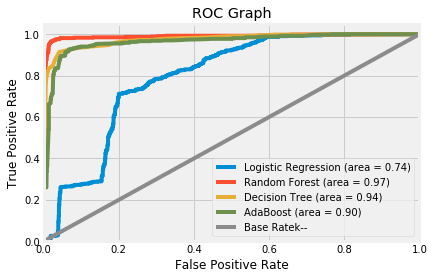

In [28]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logis.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
ada_fpr, ada_tpr, ada_thresholds = roc_curve(y_test, ada.predict_proba(X_test)[:,1])

plt.figure()

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

# Plot Decision Tree ROC
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)

# Plot AdaBoost ROC
plt.plot(ada_fpr, ada_tpr, label='AdaBoost (area = %0.2f)' % ada_roc_auc)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()